# Model Training

## Importing Data and Packages

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV 
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')




## Getting the CSV Dataset

In [2]:
import pandas as pd
df = pd.read_csv('../data/ecommerce_customer.csv') 

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df = df.drop(columns=['Email', 'Address', 'Avatar'])  # Drop unnecessary columns

In [5]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# Preparing for the Machine Learning

In [6]:
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']   

In [7]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [8]:
# Creating Column Transformer and StandardScaler
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [  
        ("StandardScaler", numeric_transformer, num_features),
    ]
)    

In [9]:
X = preprocessor.fit_transform(X)   

In [10]:
X.shape

(500, 4)

In [11]:
# seperate into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape



((400, 4), (100, 4))

In [12]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, rmse, mae, r2

## Metrics Model Training

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "Support Vector Regressor": SVR()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    model_train_mse, model_train_rmse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_rmse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('..........................................')

    print("Model performance for Test set")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')   

          


          

Linear Regression
Model performance for Training set
-Root Mean Squared Error: 9.7889
-Mean Absolute Error: 7.7270
-R2 Score: 0.9854
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.4816
-Mean Absolute Error: 8.5584
-R2 Score: 0.9778


Ridge Regression
Model performance for Training set
-Root Mean Squared Error: 9.7906
-Mean Absolute Error: 7.7211
-R2 Score: 0.9854
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.4621
-Mean Absolute Error: 8.5394
-R2 Score: 0.9779


Lasso Regression
Model performance for Training set
-Root Mean Squared Error: 9.9382
-Mean Absolute Error: 7.8640
-R2 Score: 0.9850
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.5152
-Mean Absolute Error: 8.5737
-R2 Score: 0.9777


ElasticNet Regression
Model performance for Training set
-Root Mean Squared Error: 27.6502
-Mean Absolute Error: 21.8527
-R2 Score: 

## Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.977895
0,Linear Regression,0.977813
2,Lasso Regression,0.977670
9,CatBoost Regressor,0.961630
8,XGBoost Regressor,0.947052
6,Random Forest Regressor,0.930013
4,KNeighbors Regressor,0.907920
3,ElasticNet Regression,0.880416
7,AdaBoost Regressor,0.873600
5,Decision Tree Regressor,0.864653


## Ridge Regression

In [15]:
rig_model = Ridge(fit_intercept=True)
rig_model.fit(X_train, y_train)
y_pred = rig_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.79


## Plotting y_pred and y_test

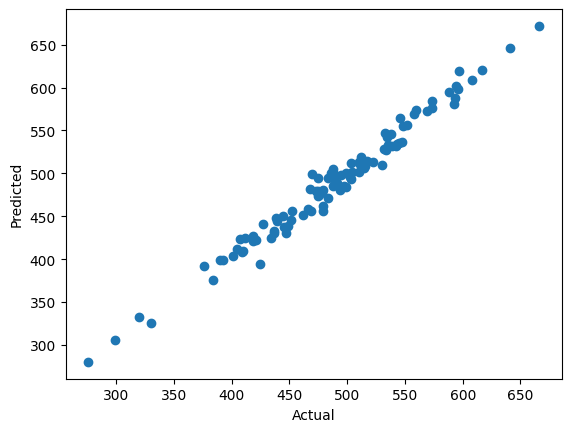

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

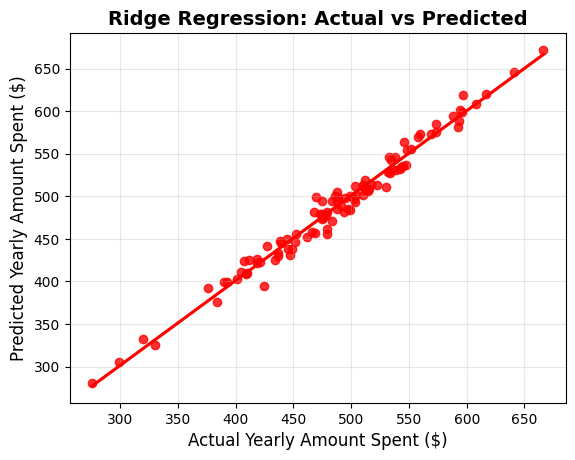

In [17]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel('Actual Yearly Amount Spent ($)', fontsize=12)
plt.ylabel('Predicted Yearly Amount Spent ($)', fontsize=12)
plt.title('Ridge Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## Actual Versus Predicted

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
361,401.033135,403.097473,-2.064338
73,534.777188,542.440885,-7.663697
374,418.602742,426.804101,-8.201359
155,503.978379,501.913057,2.065322
104,410.069611,409.886578,0.183033
...,...,...,...
347,593.156401,588.134030,5.022372
86,487.379306,485.214399,2.164907
75,478.719357,456.040621,22.678736
438,392.992256,398.921087,-5.928831


## Residual Analysis

Analyzing prediction errors to validate model assumptions

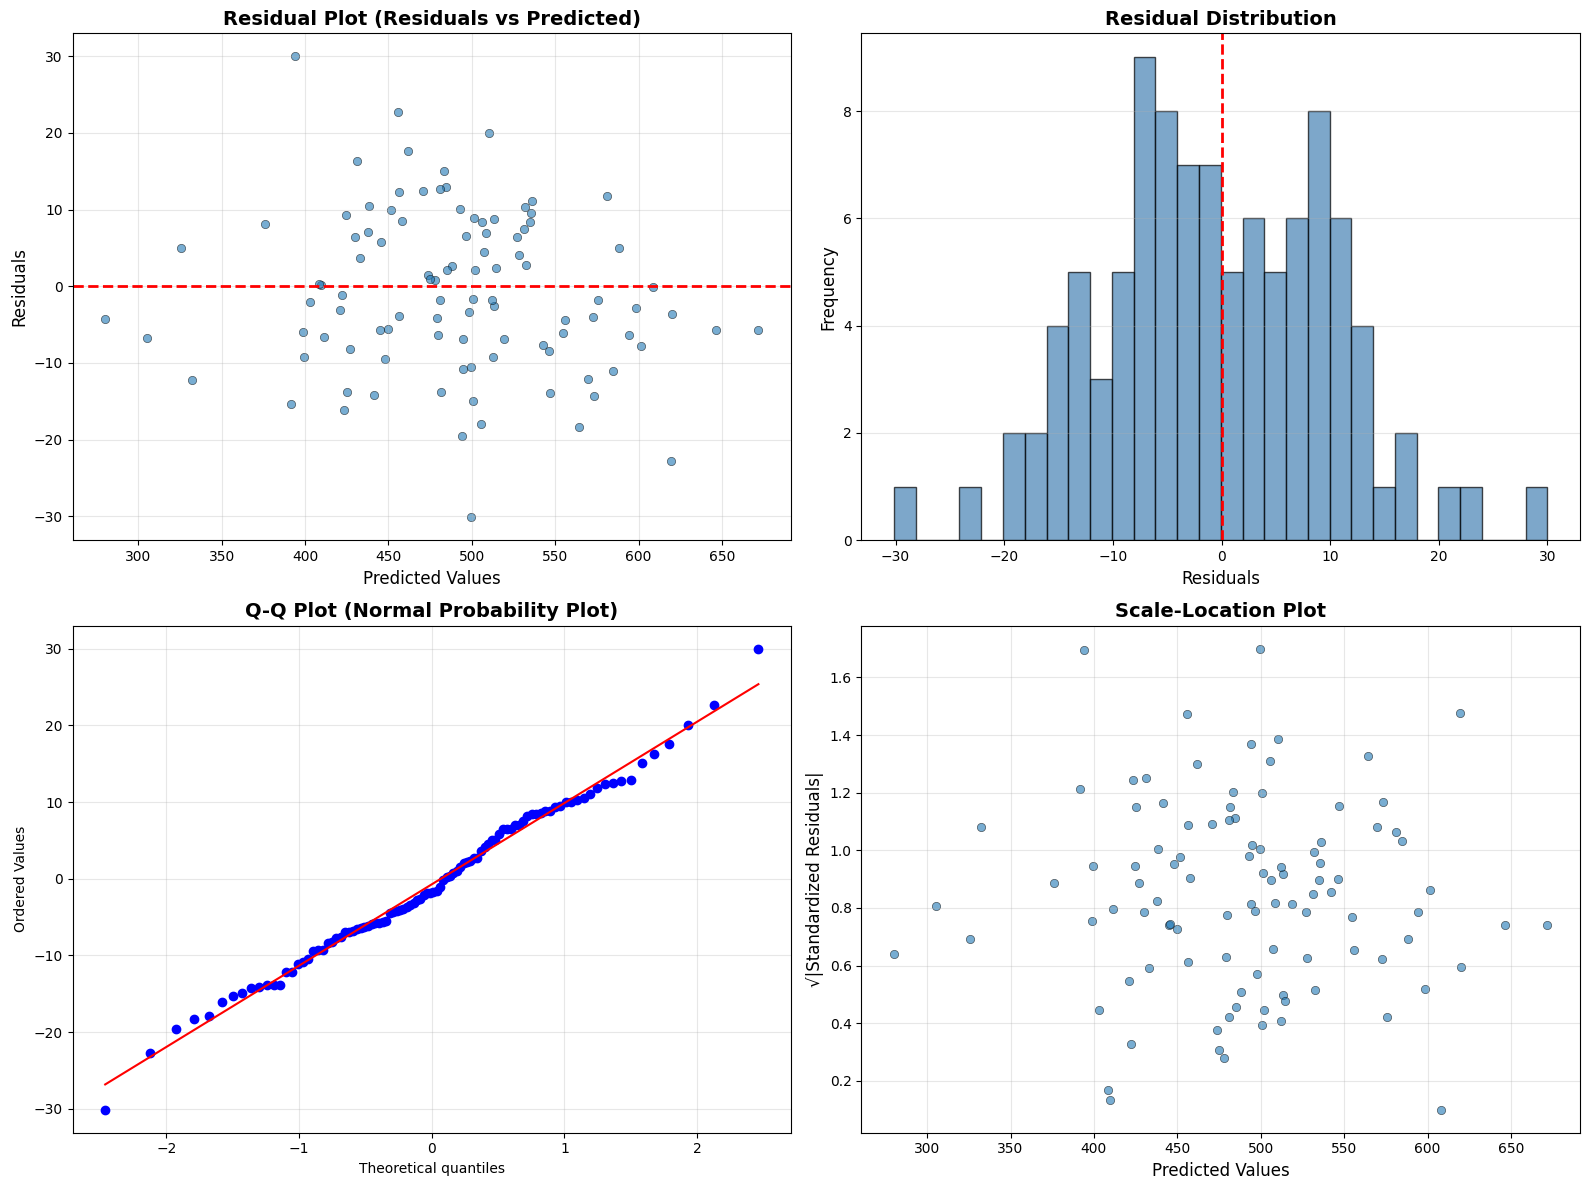

In [19]:
# Calculate residuals
residuals = y_test - y_pred

# Create comprehensive residual plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals vs Predicted Values
axes[0, 0].scatter(y_pred, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residual Plot (Residuals vs Predicted)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Distribution (Histogram)
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Q-Q Plot (Normal Probability Plot)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Probability Plot)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scale-Location Plot (Sqrt of Standardized Residuals)
residuals_normalized = residuals / np.std(residuals)
axes[1, 1].scatter(y_pred, np.sqrt(np.abs(residuals_normalized)), alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Predicted Values', fontsize=12)
axes[1, 1].set_ylabel('√|Standardized Residuals|', fontsize=12)
axes[1, 1].set_title('Scale-Location Plot', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Residual Statistics

Summary of residuals

In [20]:
# Calculate residual statistics
residual_stats = {
    'Metric': ['Mean', 'Median', 'Std Deviation', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)'],
    'Value': [
        residuals.mean(),
        residuals.median(),
        residuals.std(),
        residuals.min(),
        residuals.max(),
        residuals.quantile(0.25),
        residuals.quantile(0.75)
    ]
}

residual_df = pd.DataFrame(residual_stats)

print("=" * 60)
print("RESIDUAL STATISTICS")
print("=" * 60)
print(residual_df.to_string(index=False))
print("=" * 60)

# Normality test
from scipy.stats import shapiro, normaltest

shapiro_stat, shapiro_p = shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("  ✅ Residuals appear to be normally distributed (p > 0.05)")
else:
    print("  ⚠️  Residuals may not be normally distributed (p ≤ 0.05)")

# Homoscedasticity check (constant variance)
print(f"\n✓ Check Residual Plot: Points should be randomly scattered around zero")
print(f"✓ Check Scale-Location Plot: Points should be randomly distributed")
print("=" * 60)

RESIDUAL STATISTICS
       Metric      Value
         Mean  -0.727458
       Median  -1.793747
Std Deviation  10.489363
          Min -30.128318
          Max  29.985226
     Q1 (25%)  -7.092683
     Q3 (75%)   7.178952

Shapiro-Wilk Test for Normality:
  Statistic: 0.9940
  P-value: 0.9424
  ✅ Residuals appear to be normally distributed (p > 0.05)

✓ Check Residual Plot: Points should be randomly scattered around zero
✓ Check Scale-Location Plot: Points should be randomly distributed


## Key Insights from Residual Analysis


**1. Residual Plot (Top Left):**
-  Points randomly scattered around zero line = Good
-  Pattern (curve, funnel) = Model missing something

**2. Residual Distribution (Top Right):**
-  Bell-shaped (normal) distribution = Good

**3. Q-Q Plot (Bottom Left):**
-  Points follow diagonal line = Residuals are normal
-  Points deviate from line = Non-normal residuals

**4. Scale-Location Plot (Bottom Right):**
-  Horizontal band = Constant variance (homoscedasticity)
-  Funnel shape = Non-constant variance (heteroscedasticity)

### Model Assumptions Validation:

1. **Linearity**: Residuals are centered around zero 
2. **Independence**: No autocorrelation in residuals 
3. **Homoscedasticity**: Constant variance of residuals 
4. **Normality**: Residuals follow normal distribution 